Chapter 4: Text and Labels
==========================

This chapter is all about putting labels and other text on your plots.
We couldn’t avoid discussing some of this in previous chapters, because
most plots need some time of textual information, but here we’ll get
into all the details. By the end of this chapter you will be able to
exercise complete control of the text on your graphs.

One thing we should get out of the way up front is the issue of special
characters. In the past, one had to use a special notation to insert
Greek letters and other exotic (from the point of view of an English
speaker) characters and symbols into gnuplot output. Now, gnuplot is now
Unicode aware. Simply include the Unicode symbols in your gnuplot
commands, and they will appear in the output, as long as the font
supports them. It is up to you to know how to type Unicode with your
system. On Linux, you can use the compose key, or whatever shortcuts
your editor supports. On Apple and Windows machines, there are [several
methods](https://discussions.apple.com/thread/1899290?tstart=0)
available. Also, you can always cut and paste from a web browser or
other application where the text is displayed.

If you are using gnuplot in concert with LaTeX, you can use that
typesetting system to insert labels and text for you. This is a
specialized topic that deserves its own chapter, and we’ll have a whole
chapter devoted to LaTeX [later](#latex) in the book.

Labeling the Axes
-----------------

In most of our examples up to now the axes have been marked with tics,
and these tics have had labels: either numbers or, as in many of the
examples in the previous chapter, text taken from a data file. Usually
we want to include some additional information on the axes, to describe
what is being plotted along each dimension. This is was *axis labels*
are for. You can attach labels to the horizontal and vertical axes (and
others, for plot types that we’ll cover in later chapters).

In [ ]:
set termopt lw 3
set key at graph .7, .9
set xlabel "Time (sec.)"
set ylabel "Sine Function"
set y2label "Cosine Function"
set xr [0 : 2*pi]
plot sin(x), cos(x)

You can make multiline labels by inserting a code for newline
characters. You might have to add the line `set encoding utf8` near the
beginning of this script, depending on the terminal you are using, if
the Greek letter comes out wrong.

In [ ]:
set termopt lw 3
set key at graph .7, .9
set xlabel "Time\\n(μ seconds)"
set ylabel "Sine\\nFunction"
set y2label "Cosine\\nFunction"
set xr [0 : 2*pi]
plot sin(x), cos(x)

The labels can be `offset` from their default positions by adding this
keyword to the set command. The default coordinate system is in
characters, where every unit roughly corresponds to the width of a
character. Here we shift the `xlabel` by 15 character widths to the
left, and half a character width upwards.

In [ ]:
set termopt lw 3
set key at graph .7, .9
set xlabel "Time (μseconds)" offset -15, 0.5
set ylabel "Sine\\nFunction"
set y2label "Cosine\\nFunction"
set xr [0 : 2*pi]
plot sin(x), cos(x)

The font and color of each label can be separately specified (`tc` is
the abbreviation for `textcolor`). In this example we’ve set the
vertical axis labels and the corresponding curves to the same color, to
show which axis goes with which curve. We’ve completed the plot by
adding a title, in a larger font size. Note that gnuplot does not supply
its own fonts, so you need to choose a font that is displayed on your
system; if you don’t have the font used in the title in this script,
gnuplot will substitute something else.

In [ ]:
set termopt lw 3
set key at graph .7, .9
set title "Circular Functions" font "LibertinusSerifDisplay, 22"
set xlabel "Time (μseconds)" offset -15, 0.5\
     font "Helvetica, 16" tc "blue"
set ylabel "Sine\\nFunction" font ",16" tc "red"
set y2label "Cosine\\nFunction" font ",16" tc "orange"
set xr [0 : 2*pi]
plot sin(x) lc rgb "red", cos(x) lc rgb "orange"

More Fun with the Key
---------------------

Previously, we’ve learned how to position the *key*, the legend that
gnuplot generates automatically, both inside and outside the graph. The
key can be customized in other ways, as well. Here it is with a box
around it:

In [ ]:
set key top left box
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

The key in the previous example looked a bit crowded inside its box. We
can *add* to the width and height of the box by adding some keywords to
the command:

In [ ]:
set key top left box width 1 height 1
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

If we prefer a horizontal legend, that can be done as well:

In [ ]:
set key top left box width 1 height 1 horizontal
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

Gnuplot is very [customizable](#attention-to-style). The style of the
lines that make up the box can be controlled, as well as the font used
in the titles:

In [ ]:
set key top left box lw 3 lc "violet" width 1 height 1\
   font "Helvetica, 20"
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

One problem with the key in all the previous examples was that the
default length of line used was not long enough to make clear which dash
pattern was intended. This can be adjusted, as well (the default units
for most of these key specifications are character widths):

In [ ]:
set key top left box width 1 height 2 samplen 20
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

If you prefer the names to come after the curve samples, use the keyword
`reverse`; this goes well with the `Left` keyword, which justifies the
text to the left:

In [ ]:
set key top left box width 1 height 1 samplen 20\
  Left reverse 
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

The key can have its own title — but it’s best not to use a box in that
case, because the titles and boxes sometimes collide.

In [ ]:
set key width 1 height 1 samplen 20\
  title "Powers of x" font "Helvetica, 20"
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

In the previous example, we removed the positioning command for the key,
which put it back at the top right. Things are a bit of a mess, with the
curves colliding with the legend. If there is no convenient location for
the key, another option is to draw it on top of the curves, using the
`opaque` keyword:

In [ ]:
set key width 1 height 1 samplen 20\
  title "Powers of x" font "Helvetica, 20" opaque
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

If you plot a large number of curves, the key will continue to grow
vertically, perhaps becoming taller than you would like. Gnuplot has a
way to handle this: the `maxrow` keyword. This limits the height of the
key, forcing it to be laid out with more columns. In our example we also
show another positioning keyword: `bmargin` puts the key in the bottom
margin. There are corresponding commands called `lmargin`, etc.

In [ ]:
set key width 1 height 1 title "Powers of x"\
   font "Helvetica, 20" maxrow 3 bmargin
set xrange [0 : 1]
plot x, x**2, x**3, x**4, x**5, x**6, x**7, x**.5, x**.2

Finally, you can adjust the space between lines in the key by using the
`spacing` keyword, as well as center it overall just by appending the
keyword `center` (there is also `left` and `right`, which is the
default.

In [ ]:
set key width 1 height 1 title "Powers of x"\
   font "Helvetica, 20" maxrow 3 bmargin center\
   spacing 2
set xrange [0 : 1]
plot x, x**2, x**3, x**4, x**5, x**6, x**7, x**.5, x**.2

Labels Anywhere
---------------

You can place labels at any location on the plot. By default, the
coordinates that you specify for the labels refer to the primary x and y
axes, which makes it convenient to position labels in relation to the
plotted curves or data points. An extra positioning command can be
added, to `offset` the label by the given number of character widths.
This is usually desired, to avoid having the labels lie right on top of
the curves in applications such as the one below. You can style the
labels, and even draw a box around them, just as we did with our key in
the previous examples; since the syntax is largely the same, we won’t
repeat ourselves.

It is usually impossible to get the positioning of the labels perfect on
the first try. One usually needs to repeatedly replot while adjusting
the positioning coordinates until everything looks right. The label
*tags* are handy for this: they are the integers after the `set label`
part of the command. A subsequent `set label 2` command will just change
label 2, leaving the others intact.

In [ ]:
unset key
set xr [0 : 1]
set label 1 "x" at .4, .4 offset 1,0
set label 2 "x^{1/3}" at .2, .2**(1./3) offset 0,2
set label 3 "x^3" at .8, .8**3 offset 1,0
plot x, x**3, x**(1./3)

Enhanced Text 
-------------

You may have noticed that the “^” symbols in the label text in the
previous example turned into actual superscripts in the result. This is
because gnuplot supports a system of markup, special to gnuplot, called
*enhanced text*. It is usually turned on by default; otherwise by the
terminal option `enhanced`, but only works in those terminals that
support it. We won’t go into enhanced text syntax in detail (type
`help enhanced` for more information), mainly because, if complex or
extensive mathematical text is needed in your graphs, the LaTeX options
[discussed](#latex) in a later chapter give far better results. However,
the enhanced text mode can be useful as a simple way to place some
mathematical text on your plot, in situations where you are not too
picky about the typographical quality of the result. In this example we
plot the error function from statistics, which is built-in to gnuplot
(type `help express functions` to get a list of the other built-in
special functions), and label it with its definition. This label
demonstrates a few enhanced text features: font size and variant
selection delimited by curly brackets, and starting with `{/`; the use
of Unicode symbols directly (older guides to gnuplot rely on selecting
characters from the Symbol font using their codes, which is now
obsolete); subscripts and superscripts; and the `@` symbol, which causes
the following character (or delimited group) to behave as if it had zero
width — required here to get superscripts and subscripts to align
properly. The label is positioned in the default location, at 0,0.

In [ ]:
unset key
set xr [-3 : 3]
set label "erf{/:Italic (x) = 2/π^{1/2}{/=24 ∫^@{/=9 x}_{/=9 0}} e^{-t^2} dt}" offset 1,0
plot erf(x)

Coordinate Systems
------------------

We could not avoid referring to some of gnuplot’s coordinate systems in
some previous examples, because explaining certain features required
that we position a label or plot element. Here we’ll explain these
concepts more completely.

Gnuplot provides *five* distinct coordinate systems. Whenever you need
to position something, you can mix and match these at will, using
coordinates that are most convenient for you. We’ve already done this,
when we positioned a label for a curve using the x and y coordinates,
but gave it a small offset using the `character` coordinate system. This
technique ensures that the label will be pushed off by one character
width from the labeled point, regardless of the `xrange` or `yrange`.

In this example we’ll construct a graph that demonstrates four of the
coordinate systems directly; the fifth one, the `screen` system, will
make more sense for an example that will appear in a later chapter. The
`x2r`, `y2r`, `x2tics`, and `y2tics` setting are for a second set of
axes, defining the `second` coordinate system.

In [ ]:
unset key; set grid lt -1
set xr [0 : 10]; set yr [0 : 10]
set x2r [0 : 100]; set y2r [0 : 100]
set xtics 1; set ytics 1
set x2tics 10; set y2tics 10
set label "First 2, 2" at 2,2
set label "Second 70, 80" at second 70, 80 tc "blue"
set label "Graph .5, .5" at graph .5, .5
set label "Character 20, 15" at character 20, 15
set label "12345678901234567890" at character 1, 16 tc "green"
plot 0, 0

Plotting Labels from Files
--------------------------

Up to now we’ve typed out the label text directly in the script. It’s
also possible to read the label from a data file. This is often
convenient, because data files commonly contain labels and text
annotating the data. If you add the command `with labels` when plotting
from a data file, gnuplot will read the column listed third in your
`using` command to get the text of the labels to plot. Let’s revisit our
“energySources” datafile, that we used in the histogram chapter. If you
don’t have it, you can download it from the usual place. We’ll plot the
country name on coordinates that map the percentage of fossil fuel
vs. hydropower production.

In [ ]:
unset key
set xr [10 : 80]
set yr [-5 : 20]
set xlab "Fossil Fuel %"
set ylab "Hydropower %"
plot "energySources" u 2:3:1 with labels\
   font "Helvetica, 20"

We can also set other properties of the text labels based on data in the
file. In this example we’ll repeat the previous graph, but color the
labels according to the nuclear power percentage. Gnuplot has the
concept of a currently active *color palette*. This can be selected or
defined by the user, but we’ll get into that in a [later
chapter](#palettes). The default, that we’ll use in this example, is the
typical heat-map palette. If you use the special syntax `palette z` in
the color specification, this will take the fourth column from the
`using` clause and use it to select a color from the palette. The range
of values that map on to the palette it set with the `set cbrange`
command: here we set it to run from 0 to 100, since we are dealing with
percentages. The palette is displayed by default, and can have its own
label.

In [ ]:
unset key
set xr [10 : 80]
set yr [-5 : 20]
set cbr [0 : 100]
set xlab "Fossil Fuel %"
set ylab "Hydropower %"
set cblab "Nuclear power %"
plot "energySources" u 2:3:1:4 with labels tc palette z\
   font "Helvetica,20"

To make our graph more precise, we can plot points with the labels.
There’s nothing really new in this example, aside from illustrating the
use of `lc palette z` to set the “`linecolor`” of the points, but it’s
worth illustrating the style. We’ve also adjusted the font of the axis
and colorbar labels; it’s not unlikely that you don’t have this
particular font on your system, in which case gnuplot will substitute
something else; or you can substitute the font of your choice.

In [ ]:
unset key
set xr [10 : 80]
set yr [-5 : 20]
set cbr [0 : 100]
set xlab "Fossil Fuel %" font "DejaVu Serif, 18"
set ylab "Hydropower %" font "DejaVu Serif, 18"
set cblab "Nuclear power %" font "DejaVu Serif, 18"
plot "energySources" u 2:3:1:4 with labels tc palette z\
   font "Helvetica,20",\
   "" u 2:3:4 w points pt 7 ps 3 lc palette z

As you saw, there is a problem with the previous graph. The points are
plotted on top of the labels, making them hard to read, and not
producing the effect we were after. Fortunately, there are justification
and `offset` commands for labels:

In [ ]:
unset key
set xr [5 : 80]
set yr [-5 : 20]
set cbr [0 : 100]
set xlab "Fossil Fuel %" font "DejaVu Serif, 18"
set ylab "Hydropower %" font "DejaVu Serif, 18"
set cblab "Nuclear power %" font "DejaVu Serif, 18"
plot "energySources" u 2:3:1:4 with labels tc palette z\
   font "Helvetica,20" right offset -1,0,\
   "" u 2:3:4 w points pt 7 ps 3 lc palette z

In the previous graph we were obligated to expand the `xrange` a bit in
order to accommodate the labels and points. Like tic labels, arbitrary
labels can be rotated. Here is another way to fit all the information on
the graph, while keeping everything big:

In [ ]:
unset key
set xr [10 : 80]
set yr [-5 : 20]
set cbr [0 : 100]
set xlab "Fossil Fuel %" font "DejaVu Serif, 18"
set ylab "Hydropower %" font "DejaVu Serif, 18"
set cblab "Nuclear power %" font "DejaVu Serif, 18"
plot "energySources" u 2:3:1:4 with labels tc palette z\
   font "Helvetica,20" offset -1,-1 rotate by -25,\
   "" u 2:3:4 w points pt 7 ps 3 lc palette z

Hypertext Labels
----------------

Gnuplot provides another way to plot a set of points with associated
labels. It can make an interactive plot, were the labels are hidden
until the user hovers the mouse pointer over them to make them appear.
This is particularly useful when you have a large collection of points
and don’t want a huge mass of possibly overlapping labels.

We can not display the full result here in this book, because there is
no standard way for PDF documents to include this type of interactivity.
However, if you go to the download area on the publisher’s website, you
will find a section that refers to supplementary material, which will
have a link that you can follow to see the interactive graph, in the
form of an SVG image. Here we’ll reproduce the appearance of the graph,
without its mouse interaction.

The script saves the plot in an SVG file on disk, following the second
line. The `set term` command before that contains some keywords that are
required to include the mouse interaction. The script ends with a bare
`set out` command, that ensures that all the output is flushed to the
file. You can use the file in various ways in your webpages; our
approach is to include it using the HTML *object* tag.

``` gpl
set term svg mouse standalone
set out "energy.svg"
unset key
set xr [10 : 80]; set yr [-5 : 20]; set cbr [0 : 100]
set xlab "Fossil Fuel %" font "DejaVu Serif, 18"
set ylab "Hydropower %" font "DejaVu Serif, 18"
set cblab "Nuclear power %" font "DejaVu Serif, 18"
plot "energySources" u 2:3:1:4 with labels hypertext\
   point pt 7 ps 3 lc palette z
set out
```

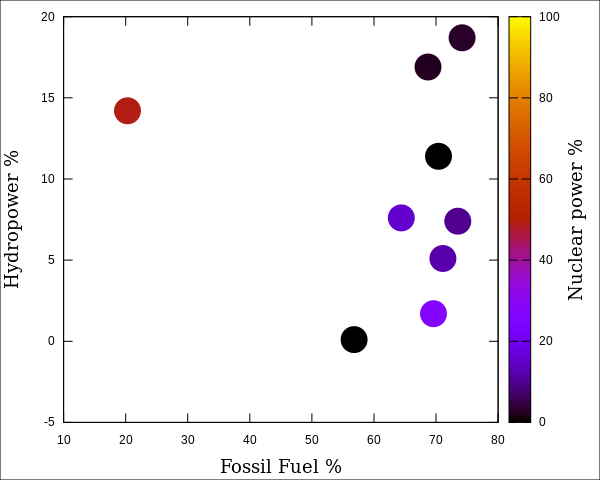

Horizontal Bar Charts
---------------------

All of the bar charts in the previous chapter were of the vertical kind.
That’s because gnuplot does not include a horizontal bar chart style.
But, armed with our new knowledge of how to manipulate text, we can make
one. The trick is to rotate the text on the graph so that when the
entire image is rotated for display or publication, everything is
readable. The example includes the rotation of tic labels, something
that we also visited in the chapter on histograms.

In [ ]:
set style data histogram
set style fill solid border -1
unset key; unset xlab
set bmargin 3
set label "Energy Usage of Several Countries"\
   font "Helvetica, 16"\
   rotate by 90 offset 0,2 tc "steelblue"
set ylab "Nuclear Power %"\
   font "DejaVu Serif, 18" offset 1,0
set xlab "Fossil Fuel %" font "DejaVu Serif, 18"
set ytics rotate by 90
set xtics rotate by 45 offset 1,.2 right
plot "energySources" u 4:xtic(1)

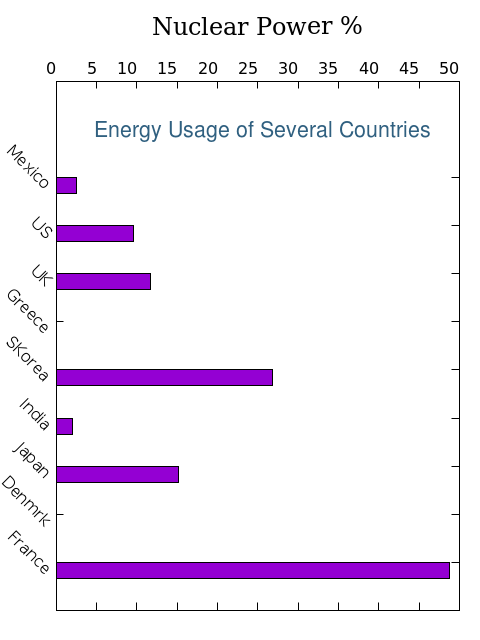